In [66]:
import pandas as pd
import numpy as np

In [67]:
df = pd.read_csv("finData.csv")

In [68]:
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
df

,cumCasesByPublishDate,cumDeaths28DaysByDeathDate,newCasesByPublishDate,newDeaths28DaysByPublishDate,cumCases,cumDeaths,dailyTest,percentPos
date,,,,,,,,
2020-01-03,NaN,NaN,0,0,0,0,NaN,NaN
2020-01-04,NaN,NaN,0,0,0,0,NaN,NaN
2020-01-05,NaN,NaN,0,0,0,0,NaN,NaN
2020-01-06,NaN,NaN,0,0,0,0,NaN,NaN
2020-01-07,NaN,NaN,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-01-03,2654779.0,77190.0,54990,455,2686534,75090,429488.0,0.128036
2021-01-04,2713563.0,77786.0,58784,407,2745318,75497,466600.0,0.125984
2021-01-05,2774479.0,78273.0,60916,830,2806234,76327,501324.0,0.121510


In [69]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from datetime import datetime

In [154]:
def func(x, a, b, c, d):
    return 1/(a*np.sqrt(2*np.pi)) * np.exp(-1/2 * ((x - b)/a)**2)

<AxesSubplot:xlabel='date'>

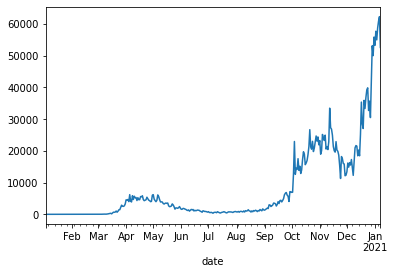

In [141]:
df["newCasesByPublishDate"].plot()

In [142]:
df["newCasesByPublishDate"].index

DatetimeIndex(['2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-11', '2020-01-12',
               ...
               '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-01',
               '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
               '2021-01-06', '2021-01-07'],
              dtype='datetime64[ns]', name='date', length=371, freq=None)

In [143]:
redCaseDat = df["newCasesByPublishDate"].loc["2020-12-1":]

In [144]:
redCaseDat = redCaseDat.reset_index()
redCaseDat["newCasesByPublishDate"]

0     13430
1     16170
2     14879
3     16298
4     15539
5     17272
6     14718
7     12282
8     16578
9     20964
10    21672
11    21502
12    18447
13    20263
14    18450
15    25161
16    35383
17    28507
18    27052
19    35928
20    33364
21    36804
22    39237
23    39877
24    32725
25    35691
26    30501
27    41385
28    53135
29    50023
30    55892
31    53285
32    57725
33    54990
34    58784
35    60916
36    62322
37    52618
Name: newCasesByPublishDate, dtype: int64

In [156]:
popt, pcov = curve_fit(func, redCaseDat.index, redCaseDat["newCasesByPublishDate"])

/home/ojba/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [157]:
popt

array([1.40904747e-05, 1.99998402e+00, 1.00000000e+00, 1.00000000e+00])

In [158]:
-popt[1]/(2*popt[0]) + popt[0]

-70969.36282286688

In [159]:
xDom = np.linspace(-100,100)
yPred = func(xDom, popt[0], popt[1], popt[2], popt[3])

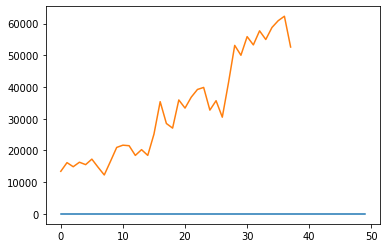

In [160]:
plt.plot(yPred)
plt.plot(redCaseDat["newCasesByPublishDate"])
plt.show()

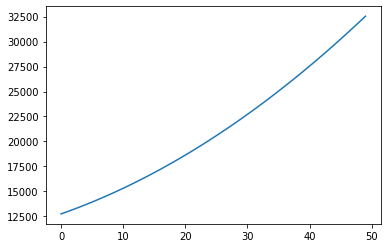

In [124]:
plt.plot(yPred)

In [125]:
xDom

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

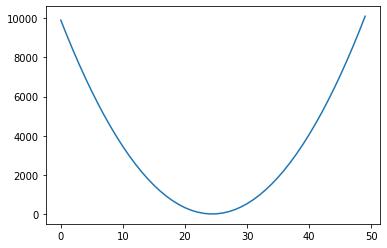

In [155]:
xT = np.linspace(-100,100)
xT
yT = func2(xT, 1, 1, 1, 0)
plt.plot(yT)

In [136]:
xT

array([  0.        ,   2.04081633,   4.08163265,   6.12244898,
         8.16326531,  10.20408163,  12.24489796,  14.28571429,
        16.32653061,  18.36734694,  20.40816327,  22.44897959,
        24.48979592,  26.53061224,  28.57142857,  30.6122449 ,
        32.65306122,  34.69387755,  36.73469388,  38.7755102 ,
        40.81632653,  42.85714286,  44.89795918,  46.93877551,
        48.97959184,  51.02040816,  53.06122449,  55.10204082,
        57.14285714,  59.18367347,  61.2244898 ,  63.26530612,
        65.30612245,  67.34693878,  69.3877551 ,  71.42857143,
        73.46938776,  75.51020408,  77.55102041,  79.59183673,
        81.63265306,  83.67346939,  85.71428571,  87.75510204,
        89.79591837,  91.83673469,  93.87755102,  95.91836735,
        97.95918367, 100.        ])

In [137]:
yT

array([1.00000000e+00, 7.20574761e+00, 2.17413578e+01, 4.46068305e+01,
       7.58021658e+01, 1.15327364e+02, 1.63182424e+02, 2.19367347e+02,
       2.83882132e+02, 3.56726781e+02, 4.37901291e+02, 5.27405664e+02,
       6.25239900e+02, 7.31403998e+02, 8.45897959e+02, 9.68721783e+02,
       1.09987547e+03, 1.23935902e+03, 1.38717243e+03, 1.54331570e+03,
       1.70778884e+03, 1.88059184e+03, 2.06172470e+03, 2.25118742e+03,
       2.44898001e+03, 2.65510246e+03, 2.86955477e+03, 3.09233694e+03,
       3.32344898e+03, 3.56289088e+03, 3.81066264e+03, 4.06676426e+03,
       4.33119575e+03, 4.60395710e+03, 4.88504831e+03, 5.17446939e+03,
       5.47222032e+03, 5.77830112e+03, 6.09271179e+03, 6.41545231e+03,
       6.74652270e+03, 7.08592295e+03, 7.43365306e+03, 7.78971304e+03,
       8.15410287e+03, 8.52682257e+03, 8.90787214e+03, 9.29725156e+03,
       9.69496085e+03, 1.01010000e+04])